In [8]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy import stats
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import os

In [9]:
link = ('/content/PET_PRI_GND_DCUS_NUS_W.csv')

In [10]:
df = pd.read_csv(link,delimiter=',')
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [12]:
df.shape

(1361, 14)

In [13]:
diesel = df.drop(columns=['A1','A2','A3','P1','P2','P3','R1','R2','R3','M1','M2','M3'])

In [14]:
diesel.head()

,Date,D1
0,01/02/1995,1.104
1,01/09/1995,1.102
2,01/16/1995,1.100
3,01/23/1995,1.095
4,01/30/1995,1.090


In [15]:
diesel.rename(columns={'D1':'Diesel'},inplace=True)

In [16]:
diesel.dtypes

,0
Date,object
Diesel,float64


In [17]:
diesel['Date'] = pd.to_datetime(diesel['Date'])

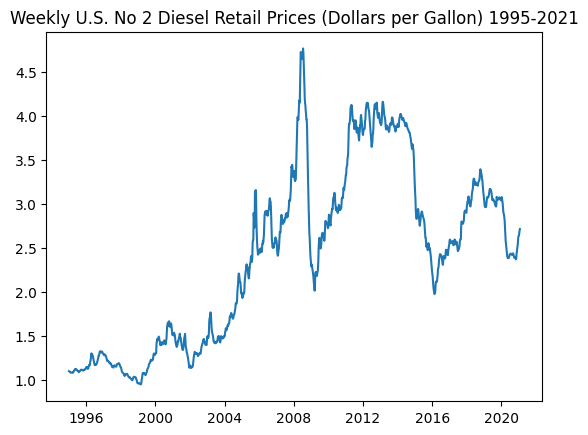

In [18]:

title = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
import datetime
import random
import matplotlib.pyplot as plt
coll='Diesel'
col2='Date'

y = diesel [coll]
x = diesel [col2]
plt.plot(x,y)
plt.gca().set_title(title)
plt.show()

In [20]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

source = ColumnDataSource(diesel)
plot = figure(x_axis_type="datetime")
legend_diesel = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
plot.line(x='Date', y='Diesel', line_width=1, source=source, color='red', legend_label=legend_diesel)
output_notebook()
show(plot)

In [21]:
diesel['Year'] = 0
diesel['Year'] = diesel['Date'].dt.strftime('%Y').astype(int)
diesel.drop(columns=['Date'])
diesel.head()

,Date,Diesel,Year
0,1995-01-02,1.104,1995
1,1995-01-09,1.102,1995
2,1995-01-16,1.100,1995
3,1995-01-23,1.095,1995
4,1995-01-30,1.090,1995


In [23]:
year = diesel[["Year","Diesel"]].groupby(['Year'],as_index=False).mean()
year.head()

,Year,Diesel
0,1995,1.109154
1,1996,1.235283
2,1997,1.198308
3,1998,1.043885
4,1999,1.120519


In [25]:
year['Diesel'] = np.log(year['Diesel'])

Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021
$1.4170382971254725 USD


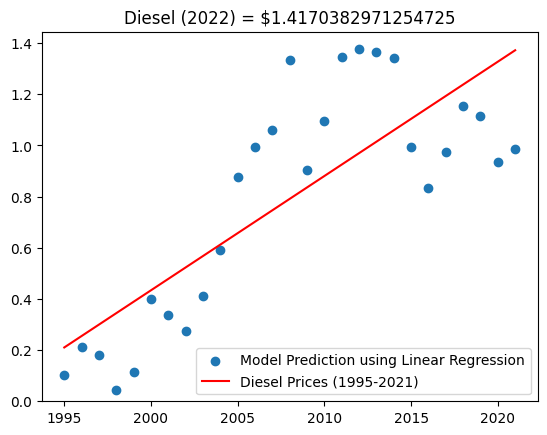

In [27]:

from scipy import stats

X = year ['Year']
y = year['Diesel']

slope, intercept, r, p, std_err = stats.linregress(X, y)

def modelPrediction(x):

   return slope*x + intercept
label = 'Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
model = list(map(modelPrediction, X))
x_pred = 2022

y_pred = modelPrediction (x_pred)

print(label)

round(y_pred, 2)

print('${} USD'.format(y_pred))

title='Diesel (2022) = ${}'.format(y_pred)
plt.title(title)
plt.scatter (X, y)
plt.plot(X, model, color='red')
plt.ylim(ymin=0)

plt.legend(['Model Prediction using Linear Regression', 'Diesel Prices (1995-2021)'])

plt.show()